# Introdcution:

*Researcher*: Richie Doherty - Data Science and Hockey enthusiast.

*Title*: First Shift Experiment

*Research Focus*: NHL Player first shift length data, and its connection to goal output per game per player. 

*Contact*: rd2414@nyu.edu

*Github*: rdoherty2019

*Github Portfiolo*: rdoherty2019.github.io

Would love to talk about Hockey and Data Science.

## Abstract:

There was a thought back in my playing days that revolved around the idea of "catching your second wind". It involved a quote by or about Wayne Gretzky. It described why he would take such a long first shift, or why his coach would double shift him on his first shift. It was so he could "catch his second wind", meaning that since he was tired after his first shift, he would catch his breath, and then have more endurance thereafter and would play better.

To my knowledge this was an intentional tactic by Gretzky or his coach to have a higher impact on the game. I want to see if this has any credence or is just some myth that a coach made up to play his best player more often at the beginning of the game. To do so I took 2015 shift data and 2015 play by play data from the NHL to determine if the first shift length had an impact on the outcome of the players average goals per game. 

My findings were that the first shift length being greater than the average shift length doesn't have an affect on the average goals per game per player. Further we found that players score more goals per game on average if they have a shorter than average first shift. We ran this experiment 10,000 more times, taking a sample of the combined first shift and average goals per game data, and we were able to replicate our results for the 2015 season. We can say with 95% confidence that our findings from the 2015 season are likely to occur. 

By researching NHL first shift and play by play data it is evident that shorter first shifts are better for players than longer first shifts, and that whoever was coaching Wayne Gretzky at the time of this quote was using it as an excuse to play the best player of all time more often in the first period to get an early lead. 

## Hypothesis

Null Hypothesis: The first shift length for a player has no impact on the players goal that game. 

Alternative Hypothesis: A longer first shift improves the player goals for that game.

## Measurement:

There are plenty of ways to measure effect on a game, but we are going to keep it limited to goals for that game.

To consider a shift "long" we're going to calculate the average shift length for all players in the league and view how those fits on the distribution. 

Then the first shift long for each game for each player we are going to compare its duration to the average length. We will place the player in a bin (Long shift, Short Shift).

Then compare the goals for all players over a season to see if the first shift had an impact on goals for, for a game on average.

## Bias/Assumptions

Outcomes/Goals: We know that all players aren't the same, for example Conner McDavid is going to be more valuable during his shifts and is going to have more shifts than a below average player in the NHL, but the hope is that by viewing the entire NHL population we’re going to average the outlier players like Connor McDavid and his less talented counter parts to the population.

Inputs/Shifts: 

I had quite a few thoughts around this one:
The first one being is a shift long if it is just higher than the average or is there some point that makes a shift long? If say for example the average shift is 40 seconds should a shift that is 41 seconds be considered long? To help keep the experiment simple the first attempt I'm going to consider it as yes, that shift is "long". In the future, an adaptation might be to only include shifts that are "long" to be 1 standard deviation from the average shift. Roughly speaking, in a normal distribution, a shift that is 1 standard deviation above the mean is equivalent to the 84th percentile. Now that’s a long shift. 

Another thought I had from my playing days was that I took a short first shift and then my second shift would be "long" to help me get into the game. But for the sake of the experiment, we're only going to focus on the first shift. The thought here being that in an NHL game, if you are a forward on the 4th line you second shift might not occur until, (40 (sec) * 4 (# of lines) * 2 (Iterations/Shifts)) = 320 Seconds / 60 Sec = 5.3 Minutes into the game. Within that time so many "events" (Goals, powerplays, penalties against, TV Timeouts) might occur to affect how shifts might be distributed. 

Finally, we're only going to consider the first shift of the first period. NHL intermissions are rather long (18 minutes), but we are going to assume that the players are into the game at that point.

## Considerations

Do we want to consider removing outliers from the data, the top and bottom percent of shifts. 

Do we want to consider standarizining the shifts? So that they are easier to view if they are above average?

Do we want to consider one stD away from the mean to be higher than average?

# Experiment

## Type: Difference in Means
Since we have a category of short versus long first shift, I am going to do a diff from diff for the means. My assumption is that the population of players and their outcomes are standard and even. The only difference is going to be their first shift length. Then I can compare the outcomes on average (Goals/Game Average) to see if first shift length has an impact.

## Type: Linear Regression
After I have decided in the null hypothesis is true or not, I am going to run a linear regression to see the first shift affects the goal outcomes

# Data

In [2]:
# Pandas for Dataframes
import pandas as pd
# Numerical Py to do some calculations
import numpy as np
# Hockey Scrapper will import the data for us
import hockey_scraper as hs
# Matplotlib for plotting charts
import matplotlib.pyplot as plt
# Seaborn for some advanced visual
import seaborn as sns

In [3]:
# Prior to this I imported the shift and pbp data for 2015 and 2016 Season
# Instead of rescrapping everytime, I had the hockey_scraper package write to my local so I can reference later
# See documentation for assistance on how to do this https://github.com/HarryShomer/Hockey-Scraper

# 2015 Shift Data
shift2015 = pd.read_csv("../hockey_scraper_data/csvs/nhl_shifts_20152016.csv")
# 2015 Play by Play Data
pbp2015 = pd.read_csv("../hockey_scraper_data/csvs/nhl_pbp_20152016.csv")

FileNotFoundError: [Errno 2] File ../hockey_scraper_data/csvs/nhl_shifts_20152016.csv does not exist: '../hockey_scraper_data/csvs/nhl_shifts_20152016.csv'

In [ ]:
#show full output on DataFrame Rows
pd.set_option('display.max_rows', 500)
# Show full number on describes
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
shift2015RowNumber = shift2015.shape[0]
print("2015 Total Number of Shifts:",shift2015RowNumber)

In [7]:
pbp2015RowNumber = pbp2015.shape[0]
print("2015 Total Number of Plays:",pbp2015RowNumber)

2015 Total Number of Plays: 413656


# Metrics for our experiment:

shift data:
Need every first shift for every player in that that. (For every game (gameID), find the the first shift (Unnamed: 0) for every player (playerId). Add that player to the category "Long" or "Short" category

pbp2015:
For every game, and every player, calculate if they scored (Go through every PBP entry for every game, and every player).


# Data Clean Up

In [10]:
# Rename column "Unnamed: 0" to shift_Id
shift2015.rename(columns = {"Unnamed: 0" : "Shift_Id"}, inplace = True)
# Rename column "Unnamed: 0" to Pbp_Id
pbp2015.rename(columns = {"Unnamed: 0" : "Pbp_Id"}, inplace = True)
# Replace NaN and infinite values with a suitable value (e.g. 0)
pbp2015['p1_ID'].replace([np.inf, -np.inf, np.nan], 0, inplace=True)
# Convert player_ids to ints not floats
pbp2015['p1_ID'] = pbp2015['p1_ID'].astype(int)

## Remove Unwanted Data

In [12]:
# Drop columns
# Need to keep goalie IDs to drop the goal from the Shift Data
pbp2015.drop(columns = {'Description','Type','Ev_Team', 'Home_Zone', 'Away_Team', 'Home_Team',
       'Time_Elapsed', 'Seconds_Elapsed', 'Strength', 'Ev_Zone','awayPlayer1', 'awayPlayer1_id',
       'awayPlayer2', 'awayPlayer2_id', 'awayPlayer3', 'awayPlayer3_id',
       'awayPlayer4', 'awayPlayer4_id', 'awayPlayer5', 'awayPlayer5_id',
       'awayPlayer6', 'awayPlayer6_id', 'homePlayer1', 'homePlayer1_id',
       'homePlayer2', 'homePlayer2_id', 'homePlayer3', 'homePlayer3_id',
       'homePlayer4', 'homePlayer4_id', 'homePlayer5', 'homePlayer5_id',
       'homePlayer6', 'homePlayer6_id', 'Away_Players', 'Home_Players',
       'Away_Score', 'Home_Score', 'xC', 'yC', 'Home_Coach',
       'Away_Coach'}, inplace = True)

In [13]:
print("Play by Play 2015", pbp2015.shape)

Play by Play 2015 (413656, 15)


In [14]:
# We want to remove Goalies from the shift Data
# Their shifts will skew the data
# Find all the unique goalie IDs from the Home and Away Goalie Ids in the Play By Play Data
# Union will drop duplicates
allGoalies2015 = np.union1d( pd.unique(pbp2015["Away_Goalie_Id"]), pd.unique(pbp2015["Home_Goalie_Id"]))
# Drop the empty fields
allGoalies2015 = allGoalies2015[~np.isnan(allGoalies2015)]

In [15]:
print("Goalie Shifts in 2015:", allGoalies2015.shape[0])

Goalie Shifts in 2015: 92


In [16]:
# We want to drop all goalies from the shift data
shift2015 = shift2015[~shift2015["Player_Id"].isin(allGoalies2015)]

In [17]:
print("Shifts without Goalies 2015:", shift2015.shape[0])
print("Row dropped from 2015:",  str(shift2015RowNumber - shift2015.shape[0]) , "Rows Dropped")

Shifts without Goalies 2015: 1048232
Row dropped from 2015: 10468 Rows Dropped


## Subset Data

In [18]:
# Subset Play by play data to be only goal data for counting later on. 
goalEvents2015 = pbp2015.loc[pbp2015["Event"]== "GOAL", :].copy()
# Rename the Play by Play Id to be Goal_Id
goalEvents2015.rename(columns={'Pbp_Id': 'Goal_Id'}, inplace=True)
# Drop all non-goal columns (Keep the assist columns p2_ID, p3_ID to count points)
goalEvents2015.drop(columns=["Date", 
                             "Period", 
                             "Event", 
                             "p1_name", 
                             "p2_name", 
                             "p2_ID", 
                             "p3_name", 
                             "p3_ID", 
                             "Away_Goalie", 
                             "Away_Goalie_Id",  
                             "Home_Goalie", 
                             "Home_Goalie_Id"], inplace = True)

In [19]:
print("Goals in 2015:", goalEvents2015.shape[0])

Goals in 2015: 7278


In [20]:
# Limit the Shifts to the first period
firstPeriodShift2015 = shift2015.loc[shift2015["Period"] == 1, :].copy()

In [21]:
# Get a list of all the Game Ids
gameIds2015 = firstPeriodShift2015["Game_Id"].unique()
print("Games in 2015:", gameIds2015.shape[0])

Games in 2015: 1320


In [22]:
def getFirstShift(gameIds, shifts):
    #Go through every game
    firstShift = []
    # For every gameId in the game IDs
    for game in gameIds:
        # Find all the shifts that game
        gameShifts = shifts[(shifts["Game_Id"] == game)]
        # Find the first shift for every player_id
        # Group by the Player Ids
        # Then take out the Shift_Id, Player_Id, Duration and Game_Id fields
        # Then take the first instance of that
        playerShifts = gameShifts.groupby("Player_Id")[["Shift_Id","Game_Id", "Player_Id", "Duration"]].first()
        # Add on the first shift for all those players
        firstShift.append(playerShifts)
    return pd.concat(firstShift)
            

In [23]:
# Find all the first shifts for 2015
firstShift2015 = getFirstShift(gameIds2015, firstPeriodShift2015)

In [24]:
firstShift2015.head()

,Shift_Id,Game_Id,Player_Id,Duration
Player_Id,,,,
8467496,0,20001,8467496,36.00000
8468504,15,20001,8468504,40.00000
8469521,1,20001,8469521,36.00000
8469707,22,20001,8469707,37.00000
8470039,12,20001,8470039,41.00000


### Understanding Data

In [25]:
print("All Shift Data 2015")
shift2015[["Duration"]].describe()

All Shift Data 2015


,Duration
count,1048232.00000
mean,44.94805
std,21.32265
min,0.00000
25%,31.00000
50%,44.00000
75%,56.00000
max,1003.00000


In [26]:
print("All First Shift Data 2015")
firstShift2015[["Duration"]].describe()

All First Shift Data 2015


,Duration
count,47517.00000
mean,41.65610
std,15.74502
min,0.00000
25%,32.00000
50%,41.00000
75%,51.00000
max,219.00000


## Distributions
Skewness is a measure of asymmetry of a distribution.In a normal distribution, the mean divides the curve symmetrically into two equal parts at the median and the value of skewness is zero. When the value of the skewness is negative, the tail of the distribution is longer towards the left hand side of the curve. When the value of the skewness is positive, the tail of the distribution is longer towards the right hand side of the curve


Kurtosis is one of the two measures that quantify shape of a distribution. Kutosis determine the volume of the outlier. Kurtosis describes the peakedness of the distribution, if the distribution is tall and thin it is (Kurtosis > 3). Values with high peakness distribution are near the mean or at the extremes. A flat distribution where the values are moderately spread out. 

### All Player Shifts

In [27]:
print( "Distribution skew of 2015 Shifts", shift2015["Duration"].skew())
print( "Distribution peakness of 2015 Shifts", shift2015["Duration"].kurtosis())

Distribution skew of 2015 Shifts 1.6312278238576077
Distribution peakness of 2015 Shifts 36.04838717756141


With the the skewness being greater than 1 at 1.63, the data is highly skewed. 

If the distribution is tall and thin it is called a leptokurtic distribution(Kurtosis > 3).

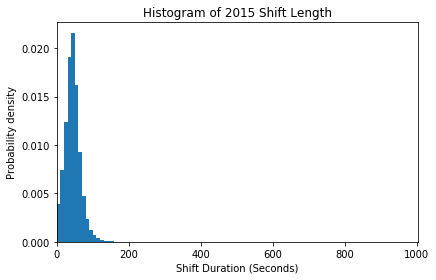

In [28]:
fig, ax = plt.subplots()
ax.hist(shift2015["Duration"], bins= 100, density = True)
ax.set_xlabel('Shift Duration (Seconds)')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of 2015 Shift Length')

fig.tight_layout()
plt.xlim(xmin=int(shift2015[["Duration"]].min()), xmax = int(shift2015[["Duration"]].max()))
plt.show()

### First Shifts

In [29]:
print( "Distribution skew of 2015 First Shifts", firstShift2015["Duration"].skew())
print( "Distribution peakness of 2015 First Shifts", firstShift2015["Duration"].kurtosis())

Distribution skew of 2015 First Shifts 0.5981245820475164
Distribution peakness of 2015 First Shifts 2.2456785868017164


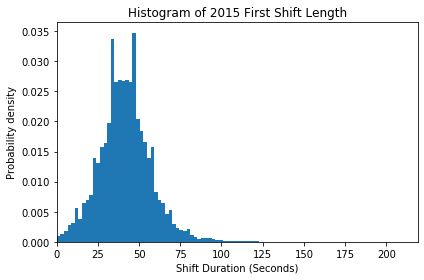

In [30]:
fig, ax = plt.subplots()
ax.hist(firstShift2015["Duration"],bins= 100, density = True)
ax.set_xlabel('Shift Duration (Seconds)')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of 2015 First Shift Length')

fig.tight_layout()
plt.xlim(xmin=int(firstShift2015[["Duration"]].min()), xmax = int(firstShift2015[["Duration"]].max()))
plt.show()

## Outlier Removal

Since my data is right tailed, meaning there are som shifts that are extremely long, they will drag my mean to the right of the median, the middle point of the data. I propose removing any shifts longer than 128 seconds. Although that is double the average shift (44 Seconds) that would be the equal of doubling shifting your best player, which is what gretzky supposedly did. 

In [31]:
withOutliers2015 = shift2015.shape[0]
shift2015= shift2015[shift2015["Duration"] < 128.0 ]
print("All Shifts Rows dropped:", withOutliers2015 -  shift2015.shape[0])

All Shifts Rows dropped: 3741


In [32]:
FSOutliers2015 = firstShift2015.shape[0]
firstShift2015 = firstShift2015[firstShift2015["Duration"] < 128.0 ]
print("First Rows dropped:", FSOutliers2015 -  firstShift2015.shape[0])

First Rows dropped: 24


### All Shifts

In [33]:
print( "Distribution skew of 2015 Shifts", shift2015["Duration"].skew())
print( "Distribution peakness of 2015 Shifts", shift2015["Duration"].kurtosis())

Distribution skew of 2015 Shifts 0.5072239994853199
Distribution peakness of 2015 Shifts 0.6943492541825886


We seem to have normalized the data to a relatively acceptable skewness of .59 and a peakness value of 2.24. We don't want to normalize the data to much because we need enough long shifts to represent a double shift and see the shift's affect on the player's game. 

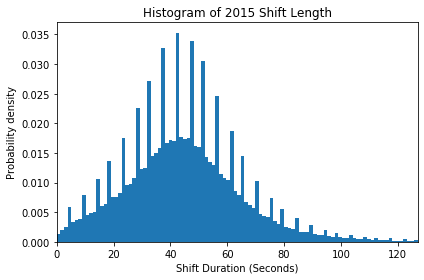

In [34]:
fig, ax = plt.subplots()
ax.hist(shift2015["Duration"], bins= 100, density = True)
ax.set_xlabel('Shift Duration (Seconds)')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of 2015 Shift Length')

fig.tight_layout()
plt.xlim(xmin=int(shift2015[["Duration"]].min()), xmax = int(shift2015[["Duration"]].max()))
plt.show()

### First Shift

In [35]:
print( "Distribution skew of 2015 First Shifts", firstShift2015["Duration"].skew())
print( "Distribution peakness of 2015 First Shifts", firstShift2015["Duration"].kurtosis())

Distribution skew of 2015 First Shifts 0.47824815856867253
Distribution peakness of 2015 First Shifts 1.3750862695135977


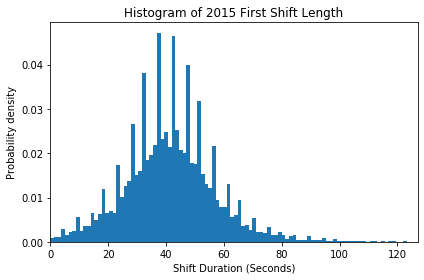

In [36]:
fig, ax = plt.subplots()
ax.hist(firstShift2015["Duration"],bins= 100, density = True)
ax.set_xlabel('Shift Duration (Seconds)')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of 2015 First Shift Length')

fig.tight_layout()
plt.xlim(xmin=int(firstShift2015[["Duration"]].min()), xmax = int(firstShift2015[["Duration"]].max()))
plt.show()

# Experiment

After removing the unwanted data, removing the outliers, we can progress with creating our experiment of difference in means. Here we're going to break out shift entries into two groups, "Long" and "Short". After that we are going to compare the Goal totals per game per player for the two groups. We are going to average out these Goals per game to try and smooth out any differences in the players and leave the only difference being their first shift length. 

## Data Preperation

In [37]:
# Decide the average shift
avgShift2015 = round(shift2015["Duration"].mean())
print("Average Shift 2015:", avgShift2015)

Average Shift 2015: 45


In [38]:
# If the shift is greater than the average make it Long outcome
# Else the shift is less than or equal to the average and we will make it Short Outcome
firstShift2015["Shift_Category"] = np.where(firstShift2015["Duration"] > avgShift2015, 'Long', 'Short')

In [39]:
# In order to effectively join the two data sets I needed to reset the index for the shift data
firstShift2015.reset_index(drop = True, inplace= True)

In [40]:
# In order to effectively join the two data sets I needed to reset the index for the shift data
firstShift2015.reset_index(drop = True, inplace= True)
# Count all the goal events by game id and then by player id
playerGoalsPer2015 = goalEvents2015.groupby(["Game_Id", "p1_ID"]).count().reset_index()
# Merge the data on a left join
# This will keep the values in the shift data where the player did not have a goal that game
# The rows without goals for the game will have NaN
mergedGame2015 = firstShift2015.merge(playerGoalsPer2015, how='left', left_on=["Game_Id",'Player_Id'], right_on = ["Game_Id","p1_ID"])
# Lets fill those NaNs with 0 values
mergedGame2015.fillna(0, inplace=True)
# I am going to drop the extra player ID column
mergedGame2015.drop(columns = ["p1_ID"], inplace = True)
mergedGame2015.head()

,Shift_Id,Game_Id,Player_Id,Duration,Shift_Category,Goal_Id
0,0,20001,8467496,36.00000,Short,0.00000
1,15,20001,8468504,40.00000,Short,0.00000
2,1,20001,8469521,36.00000,Short,0.00000
3,22,20001,8469707,37.00000,Short,0.00000
4,12,20001,8470039,41.00000,Short,0.00000


## Experiment Execution

In order to reject my null hypothesis I will need to have sufficent evidence to to say that outcome I am observing is not due to chance. That the year 2015 is not a random occurence. In order to do this I will take random samples from my group, compare the groups long and short and then see how many instances are similar to what I found in the NHL for 2015.

### 2015 NHL

In [41]:
mergedGame2015.groupby("Shift_Category")["Goal_Id"].count()

Shift_Category
Long     17609
Short    29884
Name: Goal_Id, dtype: int64

In [42]:
grouped2015 = mergedGame2015.groupby("Shift_Category")["Goal_Id"].mean()
grouped2015Short = grouped2015[1]
grouped2015Long = grouped2015[0]
grouped2015Diff = grouped2015Long - grouped2015Short
print(grouped2015)
print(grouped2015Diff)

Shift_Category
Long    0.15112
Short   0.15440
Name: Goal_Id, dtype: float64
-0.0032810951014108913


### 2015 Experiment Outcome 

This is our observed outcome.

Just looking at the total counts of Goals and the mean of Goals for 2015 the first shift duration does not influence the number of goals on average. It looks like the shorter the shift the more goals players score throughout the game. 

We will look to see if shift duration and goals/game average is correlated.

Finally, we will look to see what we are observing for 2015 if it is truly accurate or up to random chance. Using our data set we will randomly sample 10,000 seasons and compare the groups to see how many instances we will find like ours.

In [43]:
mergedGame2015.corr()

,Shift_Id,Game_Id,Player_Id,Duration,Goal_Id
Shift_Id,1.00000,0.56105,0.02271,-0.01023,0.00439
Game_Id,0.56105,1.00000,-0.02023,-0.04848,-0.00376
Player_Id,0.02271,-0.02023,1.00000,0.00925,-0.00785
Duration,-0.01023,-0.04848,0.00925,1.00000,-0.00944
Goal_Id,0.00439,-0.00376,-0.00785,-0.00944,1.00000


Goals/Game average does not appear to be correlated with First Shift Duration with a Correlation Coefficient of -0.00944. Based on these findings it does not appear that First Shift Duration has any relationship with Goals/Game average.

## Bootstrap of Difference in Means
We are going to recreate our experiment conducted on the 2015 data on many different random samples of that 2015 data to see all the possible outcomes from that data. We will take a sample of the first shift data, and group the shifts to be Long or Short. We will match it up with the goal data for those games and players. Finally, take the means of the two groups, Long/Short and then show the difference for 10,000 samples.

In [44]:
# a good sample size is around 10% of the population
## But that is too large. It is greater than 1000
rows = firstShift2015.shape[0]
print("Population of First Shifts", rows)
print("10% of First Shift Rows", rows * .1)

Population of First Shifts 47493
10% of First Shift Rows 4749.3


### Sample Size

Let’s determine our sample size (n) for First Shift Data. We will want to have a large enough sample to represent the population of first shifts in the NHL but not large enough that the sample mirrors the current population I have in the data. The goal of the random sample is to create a selection of data that could represent a population out there that we don't have access to in our current data set.

Your confidence level corresponds to something called a "z-score." A z-score is a value that indicates the placement of your raw score (meaning the percent of your confidence level) in any number of standard deviations below or above the population mean.

Z-scores for the most common confidence intervals are:

90% = 2.576
95% = 1.96
99% = 2.576

In [45]:
## Our intended level of confidence will be 95%
## where Z is the Z-score corresponding to your desired confidence level 
## p is the estimated proportion of the population with a certain characteristic
## E is the maximum error you are willing to tolerate in your estimate.
## N population size

Z = 1.96
E = 0.05
N = rows
p = .05
n = round(((Z**2 * p * (1-p))/ E**2)/(1 + ((Z**2 * p *(1-p))/((E**2) * N))))
print("Sample First Shifts:", n)

Sample First Shifts: 73


In [46]:
# Lets try one iteration
sample = firstShift2015.sample( n = n, replace = True)
sample.head()

,Shift_Id,Game_Id,Player_Id,Duration,Shift_Category
15510,344789,20432,8470041,70.00000,Long
14525,322302,20405,8476191,36.00000,Short
13095,290405,20365,8478528,45.00000,Short
28270,626574,20790,8475795,50.00000,Long
36140,801000,21008,8474688,29.00000,Short


In [47]:
sampleMerged2015 = sample.merge(playerGoalsPer2015, 
                                    how='left', 
                                    left_on=["Game_Id",'Player_Id'], 
                                    right_on = ["Game_Id","p1_ID"])
sampleMerged2015.fillna(0, inplace=True)
sampleMerged2015.drop(columns=["p1_ID"], inplace = True)
sampleMerged2015.head()

,Shift_Id,Game_Id,Player_Id,Duration,Shift_Category,Goal_Id
0,344789,20432,8470041,70.00000,Long,1.00000
1,322302,20405,8476191,36.00000,Short,1.00000
2,290405,20365,8478528,45.00000,Short,0.00000
3,626574,20790,8475795,50.00000,Long,0.00000
4,801000,21008,8474688,29.00000,Short,0.00000


In [48]:
sampleGrouped2015 = sampleMerged2015.groupby("Shift_Category")["Goal_Id"].mean()
sampleGrouped2015Short = sampleGrouped2015[1]
sampleGrouped2015Long = sampleGrouped2015[0]
sampleGrouped2015Diff = sampleGrouped2015Long - sampleGrouped2015Short
print(sampleGrouped2015)
print(sampleGrouped2015Diff)

Shift_Category
Long    0.10345
Short   0.11364
Name: Goal_Id, dtype: float64
-0.010188087774294668


We find here in this sample that the short shift group scored on average .08 more goals per game. This is just one sample, 73 shifts out of all the available first shifts in the data. It is rather close to our observed result in all of the 2015 data. Lets attempt this on many samples.

### Many Seasons
We would like to see over thousands of seasons how much the Goals/Game average would differ for our "Long" first shift group versus our "Short" first shift group. For 2015 the Goals/Game average would differ for our "Long" first shift group versus our "Short" first shift group was -0.08 Goals per game. Meanings on average the Short first shift group scored .08 more goals per games than the Long first shift group.

In [49]:
def goalsPerGameDiffBoot(shifts, goalsGame, sampleSize, iterations):
    # Collect Differences
    goalDiffs = []
    # Iterate through the range of all the iterations
    for i in range(iterations):
        # Take a random sample
        sample = shifts.sample(n = sampleSize, replace = True)
        # Merge the shift and goal data
        sampleMerged = sample.merge(goalsGame, 
                                    how='left', 
                                    left_on=["Game_Id",'Player_Id'], 
                                    right_on = ["Game_Id","p1_ID"])
        # Fill the NaNs with 0 values for no goals for that game
        sampleMerged.fillna(0, inplace=True)
        # Take a mean of all the goals
        sampleGrouped = sampleMerged.groupby("Shift_Category")["Goal_Id"].mean()
        # Calculate the difference
        sampleGroupedShort = sampleGrouped[1]
        sampleGroupedLong = sampleGrouped[0]
        sampleGroupedDiff = sampleGroupedLong - sampleGroupedShort
        # Append on to the collector
        goalDiffs.append(sampleGroupedDiff)
        
    return goalDiffs

In [50]:
diffBootData1000 = goalsPerGameDiffBoot(shifts = firstShift2015, 
                                    goalsGame = goalEvents2015, 
                                    sampleSize = n, 
                                    iterations = 1000)

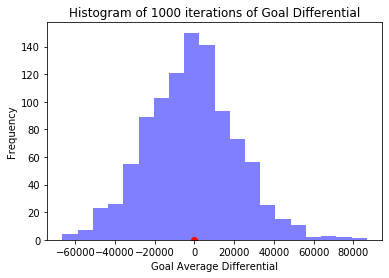

In [51]:
plt.hist(diffBootData1000, bins=20, color='blue', alpha=0.5)
plt.xlabel('Goal Average Differential')
plt.ylabel('Frequency')
plt.title('Histogram of 1000 iterations of Goal Differential')
plt.plot(grouped2015Diff , 0, 'ro')
plt.show()

In [52]:
diffBootData10000 = goalsPerGameDiffBoot(shifts = firstShift2015, 
                                    goalsGame = goalEvents2015, 
                                    sampleSize = n, 
                                    iterations = 10000)

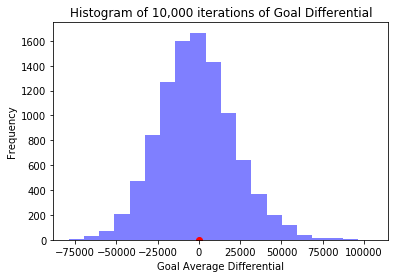

In [53]:
plt.hist(diffBootData10000, bins=20, color='blue', alpha=0.5)
plt.xlabel('Goal Average Differential')
plt.ylabel('Frequency')
plt.title('Histogram of 10,000 iterations of Goal Differential')
plt.plot(grouped2015Diff , 0, 'ro')
plt.show()

# Experiment Outcome

Final thoughts, we have failed to reject the null hypothesis. I feel that we have almost confirmed the null hypothesis, that the first shift duration does not have an effect on the average goals per game outcome for a player. I know that is this wrong terminology to use in data science but we ran through a random experiment on 1,000 and 10,000 iterations and found that our observed outcome in 2015 is likely to occur. 

It turns out that some coach in the 80s and 90s just wanted an excuse to play the best player of all time more often in the first couple shifts of a game. Having that in your back pocket as a coach must have been really nice.

## Possible future experiments

- I wonder if we decided the shift category on the median and instead of the mean.

The median would be the 50th percentile of the shift data and would be less affected by the outliers or long shifts. The mean gets dragged away from the median towards the tail of the data. For the shift data we found that the distribution was right tailed, some players got stuck out on the ice for some long shifts. If we used median it would not allow those shifts to affect how we categorize our first shifts. 

- I wonder if the first shift duration has anything to do with the point totals, not just goals.

All hockey players know, and many coaches know that players have an impact on the game without scoring goals, specifically defenseman. If a defenseman is taking a long shift to get into the game, he might be more affective at making great outlet passes or great defensive stops. All of that can't be measured in goals. 

- I wonder if the second shift should be long.

This idea came from my playing days. I always wanted to take a short first shift, touch the puck, hit someone, and get off the ice before anything bad happened. Then my next shift I would try to get good and tired, and I was in the game for the rest of it. I know this might suprise you but I'm not an NHL player, it would still be interesting to see if how I took an outlook on the game had any true affect beyond just how I felt in my head.